In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
rcParams['figure.figsize']=5,5
rcParams['font.size']=14

# Exercises

## Question 1 

Let $f(x,y) = e^{-x^2+y^2}\sin(x)$ for $-2\leq x\leq2$ and $-2\leq y\leq2$
1. Make a contour plot of f
2. Find the volume $|f(x,y)|$ in the specified range
3. Find the volume $|f(x,y)|$ in the region where $\sqrt{x^2+y^2} > 0.5$

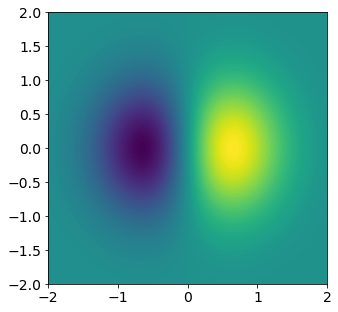

In [15]:
#1
x = np.linspace(-2,2,1000)
y = np.linspace(-2,2,1000)

xv,yv = np.meshgrid(x,y)
f = np.exp(-(xv**2+yv**2))*np.sin(xv)
plt.contourf(xv,yv,f,levels=100)

In [16]:
#2 with ravel
V = np.sum(np.abs(np.ravel(f)))*np.diff(x)[0]*np.diff(y)[0]
V

1.4861858145124311

In [17]:
#2 with unravel
V = np.sum(np.abs(f))*np.diff(x)[0]*np.diff(y)[0]
V

1.4861858145124311

In [10]:
region = np.sqrt(xv**2 + yv**2)>0.5
V = np.sum(np.abs(f[region]))*np.diff(x)[0]*np.diff(y)[0]
V

1.3447430082080254

## Question 2

After examining a circuit full of resistors you find that the voltage at 4 specified points is given by:

$3V_1 + 2V_2 + 3V_3 +10V_4 =4$

$2V_1 - 2V_2 + 5V_3 + 8V_4 =1$

$3V_1 + 3V_2 + 4V_3 + 9V_4 =3$

$3V_1 + 4V_2 - 3V_3 - 7V_4 =2$


Find the voltage

In [19]:
R = np.array([[3,2,3,10],[2,-2,5,8],[3,3,4,9],[3,4,-3,-7]])
I = np.array([4,1,3,2])

In [21]:
V = np.linalg.solve(R,I)
print("The Voltages are: ",V)

The Voltages are:  [ 0.78378378  0.03603604 -0.67567568  0.36036036]


## Question 3

An electric field is given by $\vec{E}(z,t) = E_0 \cos(z-t)\hat{x} + 2E_0\cos(z-t+\pi/2)\hat{y}$

1. Find the magnetic field for all $z \in [0,4\pi]$ and $t \in [0,10]$  using $\vec{B}(z,t) = \hat{z} \times \vec{E}(z,t)$
2. Compute the Poynting vector $\vec{S} =  \vec{E}\times \vec{B}$ for all $z$ and $t$

In [31]:
#1
z = np.linspace(0,4*np.pi,1000)
t = np.linspace(0,10,1000)
tv,zv = np.meshgrid(t,z)
Ex = np.cos(zv-tv) #dimensionless
Ey = 2*np.cos(zv-tv+np.pi/2)
Ez = np.zeros_like(tv)

Text(0.5, 1.0, '$E_x(z=0,t)$')

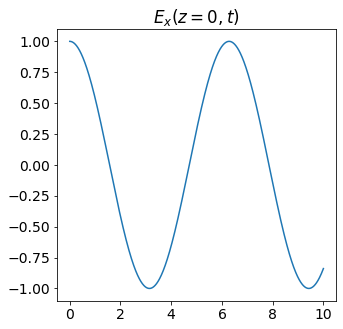

In [40]:
#E[z,t]; E[0] means E at z = 0
plt.plot(t,Ex[0])
plt.title(r'$E_x(z=0,t)$')

Text(0.5, 1.0, '$E_x(z,t=0)$')

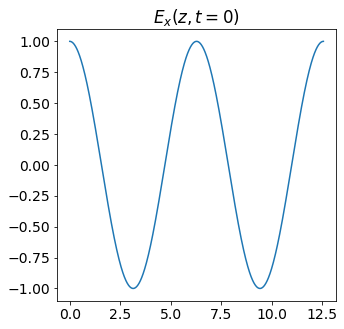

In [41]:
plt.plot(z,Ex[:,0])
plt.title(r'$E_x(z,t=0)$')

In [48]:
E = np.array([Ex,Ey,Ez])
E = np.swapaxes(E,0,-1)
zhat = np.array([0,0,1])
B = np.cross(zhat,E)
Bx, By, Bz = np.swapaxes(B,0,-1)

In [59]:
Bx

array([[-1.22464680e-16, -2.00196857e-02, -4.00373654e-02, ...,
         1.05422997e+00,  1.07118976e+00,  1.08804222e+00],
       [ 2.51572357e-02,  5.13787346e-03, -1.48820036e-02, ...,
         1.03276810e+00,  1.04986036e+00,  1.06684742e+00],
       [ 5.03104908e-02,  3.02946196e-02,  1.02757130e-02, ...,
         1.01114282e+00,  1.02836484e+00,  1.04548382e+00],
       ...,
       [-5.03104908e-02, -7.03213208e-02, -9.03251047e-02, ...,
         1.09664992e+00,  1.11333675e+00,  1.12991202e+00],
       [-2.51572357e-02, -4.51740772e-02, -6.51863922e-02, ...,
         1.07552503e+00,  1.09234967e+00,  1.10906486e+00],
       [-1.10218212e-15, -2.00196857e-02, -4.00373654e-02, ...,
         1.05422997e+00,  1.07118976e+00,  1.08804222e+00]])

Text(0.5, 1.0, '$E_y(z=0,t)$, $B_x(z=0,t)$ ')

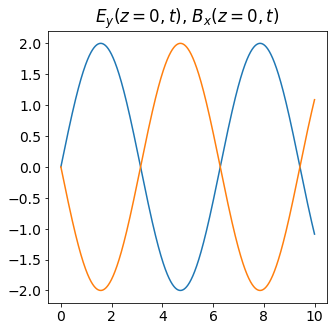

In [61]:
plt.plot(t,Ey[0])
plt.plot(t,Bx[0])
plt.title(r'$E_y(z=0,t)$, $B_x(z=0,t)$ ')

In [63]:
#2
S = np.cross(E,B)
Sx, Sy, Sz = np.swapaxes(S,0,-1)

## Question 4

Find the solutions to $\left( \frac{d^2}{x^2} + ({10x})^2 \right) f =  \lambda f$ with boundary conditions $f(0)=f(1)=0$

Hint: Use the eigenvalue method and the fact that $\frac{d^2f}{dx^2} = \frac{f_{i+1}+f_{i-1}-2f_i}{\Delta x}$ where $f_i = f(i\Delta x)$

In [66]:
N = 1000
x = np.linspace(0,1,N+1)
Dx = np.diff(x)[0]

In [120]:
#laplacian ->
main_diag = -2 * np.ones(N-1)
off_diag = np.ones(N-2)
laplacian = np.diag(main_diag)
laplacian += np.diag(off_diag,1)
laplacian += np.diag(off_diag,-1)
laplacian

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [121]:
# extra function (e.g. potential in QM)
h = np.diag(100*x[1:-1]**2)
h

array([[1.00000e-04, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 4.00000e-04, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 9.00000e-04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.94009e+01,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.96004e+01, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 9.98001e+01]])

In [ ]:
#Solve the system 
operator = laplacian/Dx**2 + h
eigenval,eigenfun = np.linalg.eigh(operator)

In [106]:
#Numpy puts the largest eigen value at the end. 
eigenval[-1]

29.85532322244065

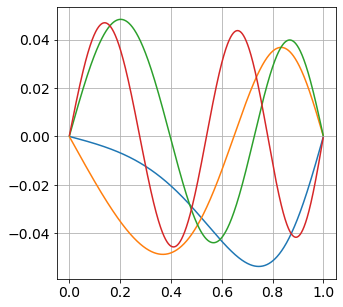

In [119]:
#Eigenfunctions
# Note that in here, we are starting from i=1 up to i=N-1. The function is 0 at the boundaries.
plt.plot(x[1:-1],eigenfun[:,-1])
plt.plot(x[1:-1],eigenfun[:,-2])
plt.plot(x[1:-1],eigenfun[:,-3])
plt.plot(x[1:-1],eigenfun[:,-4])
grid()

In [117]:
len(x)

1001

999